Exploratory Data Analysis 

In [1]:
#% pip install openpyxl
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from globals import glob
from utilities import plot_scatter
import sys
sys.path.append("../tools/")
import _db_tools as db #Personal tool for managing sqlite databases in data science

In [2]:
#Data preparation
dbh = db.SQLite_Data_Extractor("database.db") #Connect to the database
df = dbh.retrieve(glob.tooling) #Get the desired tooling data
dbh.close_conn() 
print("MEAS:")
df #Shows the df in html format

Database *database.db* found in: c:\Users\luciano.galan\Desktop\Code\Python_Eiit_RyR\a2_RyR_Analyser\database\database.db
Table *TOP_Passat_B9* retrieved succesfully.
Closed connection to: c:\Users\luciano.galan\Desktop\Code\Python_Eiit_RyR\a2_RyR_Analyser\database\database.db
MEAS:


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.3278,0.3276,0.3276,0.3276,0.3276,0.3276,0.3276,0.3280,0.3280,0.3278,...,0.3276,0.3276,0.3276,0.3276,0.3276,0.3276,0.3276,0.3277,0.3276,0.3276
1,0.3498,0.3499,0.3499,0.3499,0.3499,0.3499,0.3499,0.3498,0.3498,0.3498,...,0.3498,0.3499,0.3499,0.3499,0.3498,0.3498,0.3499,0.3499,0.3499,0.3499
2,0.3340,0.3343,0.3339,0.3343,0.3342,0.3342,0.3339,0.3338,0.3338,0.3338,...,0.3340,0.3340,0.3339,0.3340,0.3342,0.3338,0.3341,0.3340,0.3342,0.3339
3,0.3579,0.3578,0.3575,0.3577,0.3576,0.3576,0.3575,0.3575,0.3575,0.3573,...,0.3574,0.3574,0.3574,0.3574,0.3575,0.3573,0.3575,0.3574,0.3575,0.3573
4,0.3385,0.3385,0.3386,0.3386,0.3386,0.3386,0.3385,0.3382,0.3381,0.3380,...,0.3380,0.3380,0.3380,0.3380,0.3380,0.3380,0.3380,0.3381,0.3380,0.3380
5,0.3658,0.3657,0.3657,0.3657,0.3657,0.3657,0.3655,0.3654,0.3654,0.3653,...,0.3651,0.3651,0.3651,0.3651,0.3651,0.3651,0.3651,0.3651,0.3651,0.3651
6,0.3273,0.3274,0.3271,0.3275,0.3275,0.3275,0.3272,0.3270,0.3270,0.3272,...,0.3271,0.3272,0.3271,0.3271,0.3271,0.3271,0.3274,0.3271,0.3271,0.3275
7,0.3480,0.3479,0.3477,0.3480,0.3479,0.3480,0.3477,0.3477,0.3477,0.3478,...,0.3477,0.3477,0.3477,0.3477,0.3477,0.3477,0.3479,0.3477,0.3477,0.3479
8,0.3341,0.3339,0.3337,0.3342,0.3337,0.3334,0.3335,0.3342,0.3340,0.3340,...,0.3343,0.3341,0.3340,0.3341,0.3342,0.3337,0.3342,0.3341,0.3343,0.3342
9,0.3592,0.3586,0.3586,0.3587,0.3585,0.3583,0.3583,0.3588,0.3587,0.3588,...,0.3587,0.3587,0.3587,0.3587,0.3587,0.3584,0.3588,0.3587,0.3588,0.3587


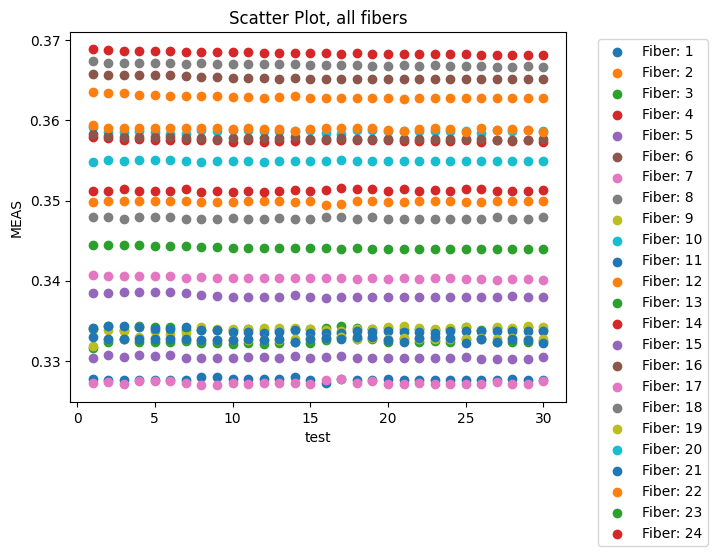

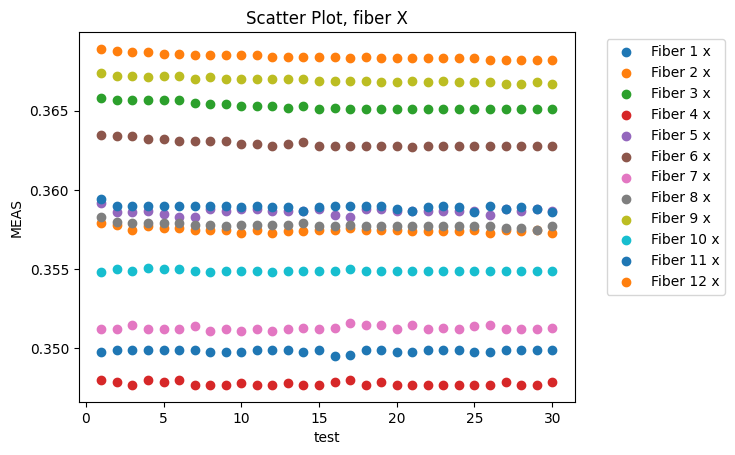

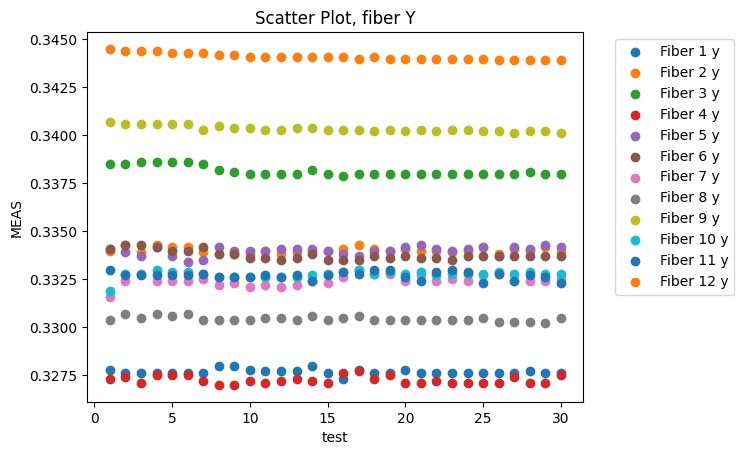

In [3]:
#Plots
plot_scatter(df, 'Scatter Plot, all fibers', 'test', 'MEAS', 'Fiber: ') #Plot all guides
plot_scatter(df, 'Scatter Plot, fiber X', 'test', 'MEAS', 'Fiber', filter='x') #Plot x axis values
plot_scatter(df, 'Scatter Plot, fiber Y', 'test', 'MEAS', 'Fiber', filter='y') #Plot y axis values

In [8]:
resume = df.transpose().describe() #Transpose the df first due to describe() working in columns.
df.transpose().describe() #This second call allows for a nicer output in jupiter.

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000
mean,0.324000,0.35305,0.336113,0.360830,0.345393,0.370373,0.321310,0.349403,0.334400,0.360193,...,0.331427,0.359630,0.347270,0.371503,0.330053,0.357480,0.33302,0.359943,0.353017,0.374210
std,0.000395,0.00034,0.000247,0.000234,0.000221,0.000178,0.000311,0.000295,0.000218,0.000200,...,0.000215,0.000214,0.000142,0.000138,0.000078,0.000066,0.00010,0.000068,0.000121,0.000088
min,0.323000,0.35230,0.335600,0.360400,0.344900,0.370100,0.320800,0.349000,0.334000,0.359900,...,0.330400,0.358600,0.346900,0.371000,0.329900,0.357400,0.33280,0.359800,0.352800,0.374100
25%,0.323800,0.35275,0.335900,0.360625,0.345300,0.370225,0.321100,0.349200,0.334200,0.360100,...,0.331400,0.359625,0.347200,0.371500,0.330000,0.357400,0.33300,0.359900,0.352900,0.374200
50%,0.324000,0.35310,0.336200,0.360900,0.345400,0.370400,0.321300,0.349350,0.334350,0.360100,...,0.331500,0.359700,0.347300,0.371500,0.330100,0.357500,0.33300,0.359900,0.353000,0.374200
75%,0.324275,0.35330,0.336300,0.361000,0.345575,0.370500,0.321550,0.349675,0.334600,0.360300,...,0.331500,0.359700,0.347300,0.371600,0.330100,0.357500,0.33310,0.360000,0.353100,0.374200
max,0.324600,0.35360,0.336400,0.361100,0.345800,0.370700,0.322000,0.350100,0.334800,0.360600,...,0.331600,0.359800,0.347600,0.371700,0.330200,0.357600,0.33320,0.360100,0.353300,0.374400


Analysis of faulty fibers

In [9]:
largest = resume.loc['std'].sort_values(ascending=False)[:5]  #Filter the 5 largest values
index = largest.index.tolist()  #Get the index in a list format
for i in range(largest.shape[0]): #Differentiate between x-fibers (odds) and y-fibers
    if index[i] % 2 == 0:
        index[i] = f"fiber x, number {index[i]+1}:"
    else:
        index[i] = f"fiber y, number {index[i]+1}:"
largest.index = index
print("Fibers with largest deviation:")
print(largest)

Fibers with largest deviation:
fiber x, number 13:    0.000408
fiber x, number 1:     0.000395
fiber y, number 14:    0.000388
fiber y, number 2:     0.000340
fiber x, number 11:    0.000318
Name: std, dtype: float64


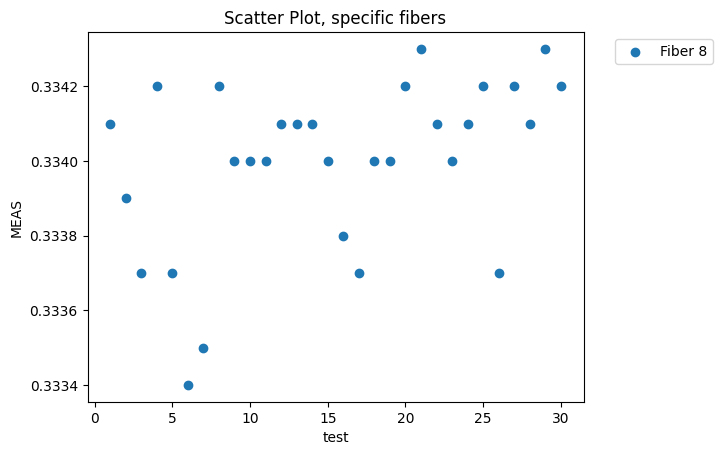

In [17]:
plot_scatter(df, 'Scatter Plot, specific fibers', 'test', 'MEAS', 'Fiber', filter=8)